# Compositing Operators
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [compositing_operators.ipynb](https://github.com/diegoinacio/computer-vision-notebooks/blob/master/Computer-Vision-Fundamentals/compositing_operators.ipynb)
---
Methods for combining and mixing images.

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import imageio

from _utils import *

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 0. Input images
---
Given the input images $A$ and $B$ (*sRGB* colorspace).

*p.s.: All the input images are normalized between 0-1.*

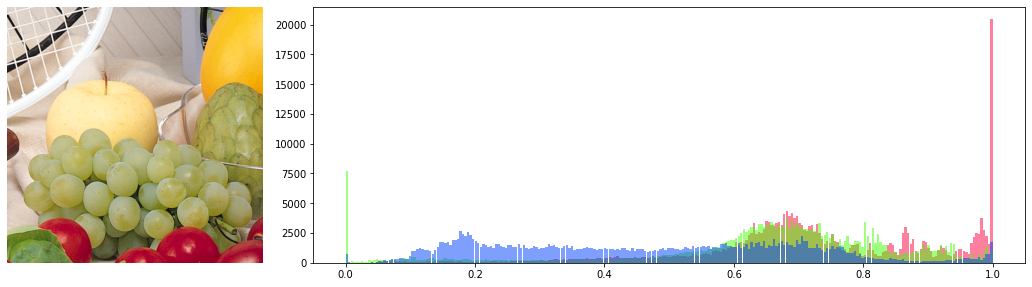

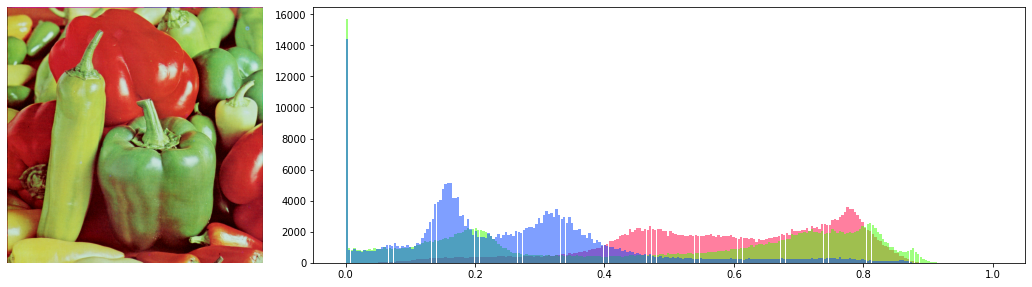

In [3]:
# Input and normalize to [0, 1]
A = imageio.imread('../_data/fruits.png')/255
histogram(A, bins=2**8, interval=[0, 1])

B = imageio.imread('../_data/pimentos.png')/255
histogram(B, bins=2**8, interval=[0, 1])

## 1. Alpha compositing operators
---

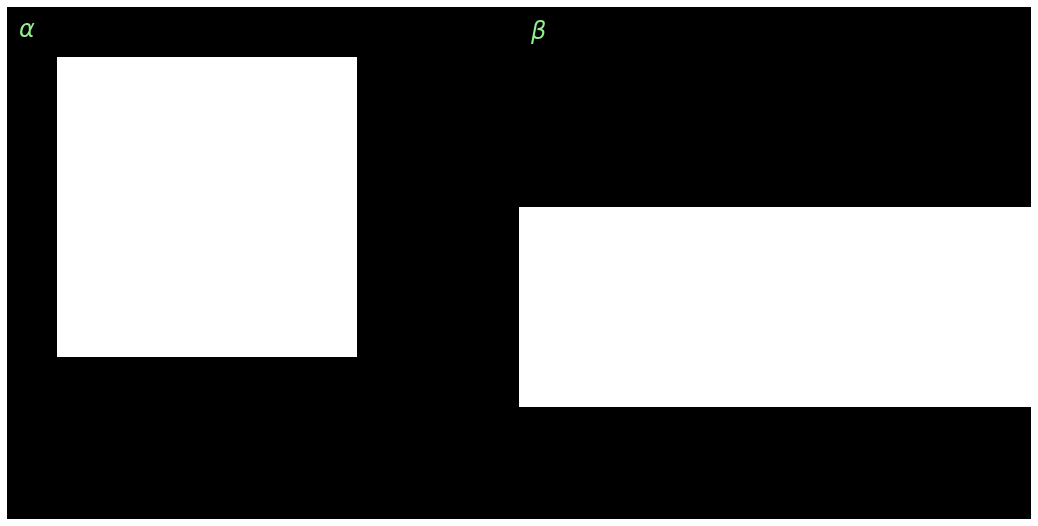

In [4]:
n1, n2, _ = A.shape
a = np.zeros((n1, n2, 1))
a[50:350, 50:350] = 1

n1, n2, _ = B.shape
b = np.zeros((n1, n2, 1))
b[200:400] = 1

panel(
    np.array([a[...,0], b[...,0]]), [2, 1],
    text_size=24, text_color='lightgreen',
    texts=[r'$\alpha$', r'$\beta$']
)

### 1.1. Over
---
$$ \large
O = A\alpha+B(1-\alpha)
$$

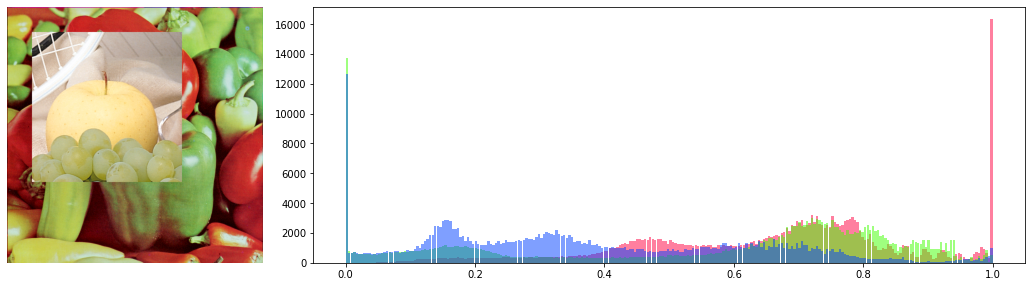

In [5]:
O = A*a + B*(1 - a)
histogram(O, bins=2**8, interval=[0, 1])

### 1.2. Atop
---
$$ \large
O = A\beta+B(1-\alpha)
$$

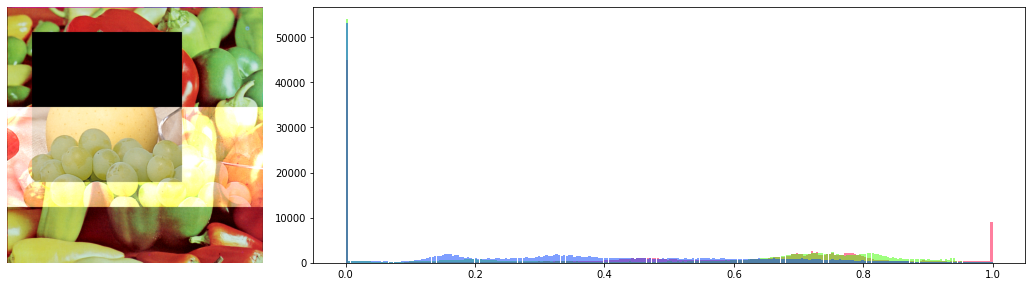

In [6]:
O = A*b + B*(1 - a)
histogram(O, bins=2**8, interval=[0, 1])

### 1.3. Conjoint over
---
$$ \large
O =
\begin{cases}
    A &, \text{if } \alpha > \beta \\
    A+\frac{B(1-\alpha)}{\beta} &, \text{otherwise}
\end{cases}
$$

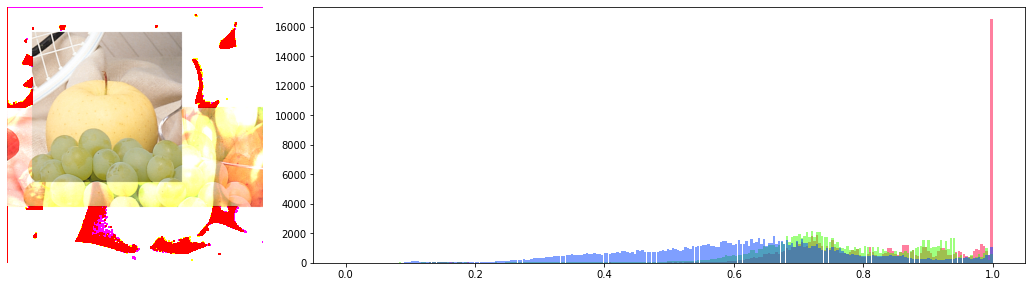

In [7]:
O = A + B*(1 - a)/b
cond = (a > b)[...,0]
O[cond] = A[cond]
histogram(O, bins=2**8, interval=[0, 1])

### 1.4. Disjoint over
---
$$ \large
O =
\begin{cases}
    A+B &, \text{if } \alpha+\beta < 1 \\
    A+\frac{B(1-\alpha)}{\beta} &, \text{otherwise}
\end{cases}
$$

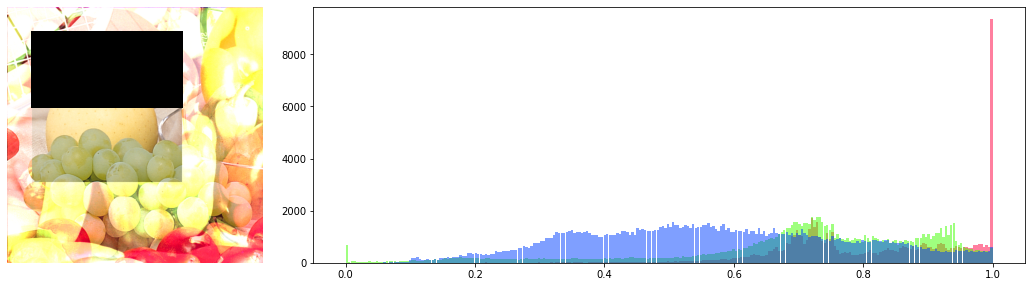

In [8]:
O = A + B*(1 - a)/b
cond = ((a + b) < 1)[...,0]
O[cond] = (A + B)[cond]
histogram(O, bins=2**8, interval=[0, 1])

### 1.5. In
---
$$ \large
O = A\beta
$$

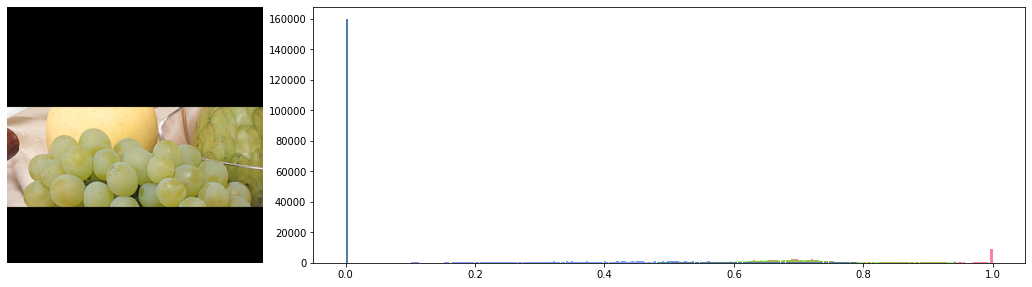

In [9]:
O = A*b
histogram(O, bins=2**8, interval=[0, 1])

### 1.6. Xor
---
$$ \large
O = A(1 - \beta) + B(1 - \alpha)
$$

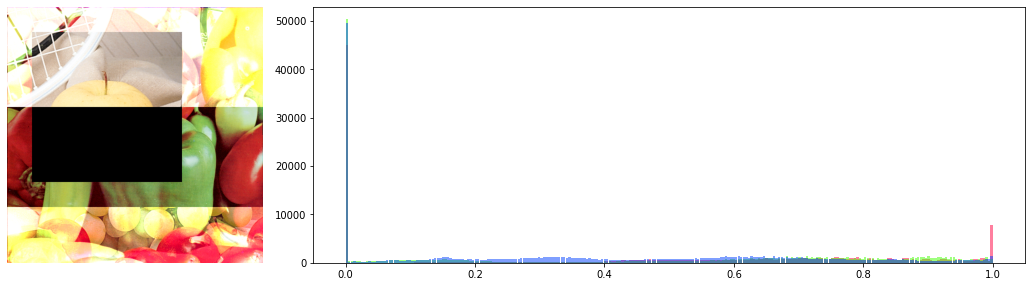

In [10]:
O = A*(1 - b) + B*(1 - a)
histogram(O, bins=2**8, interval=[0, 1])

## 2. Blend modes
---
Due the input images are in *sRGB* colorspace, it is necessary to linearize them by the $\gamma = 2.2$ before operating and the output must be transformed to *sRGB* by inverting the $\gamma$.

$$ \large
I' = I^{\gamma} \quad ; \quad O' = O^{\frac{1}{\gamma}}
$$

In [11]:
# Gamma
g = 2.2

# Gamma corrected
A_, B_ = A**g, B**g

### 2.1. Average
---
$$ \large
O' = \frac{A'+B'}{2}
$$

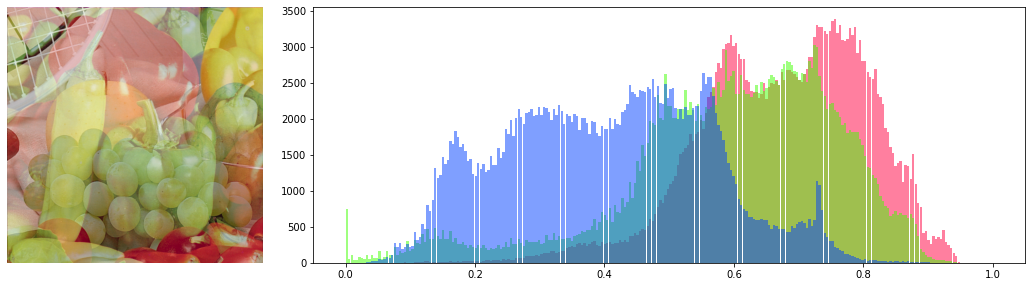

In [12]:
O = (A_ + B_)/2
histogram(O**(1/g), bins=2**8, interval=[0, 1])

### 2.2. Color burn
---
$$ \large
O' = 1 - \frac{1-B'}{A'}
$$

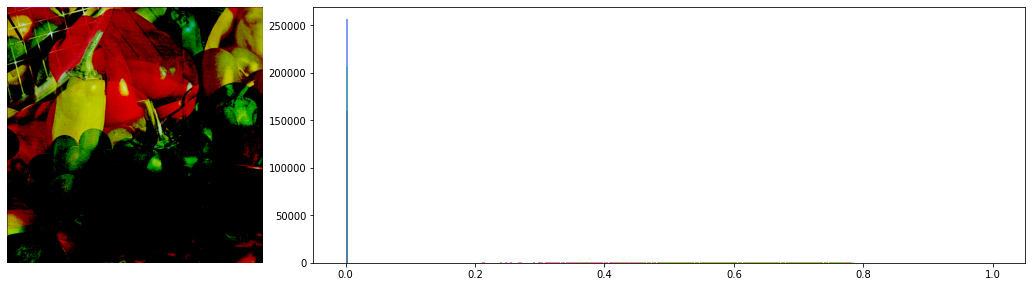

In [13]:
O = 1 - (1 - B_)/A_

# Deal with zero division
O[O < 0] = 0
O[O > 1] = 1

histogram(O**(1/g), bins=2**8, interval=[0, 1])

### 2.4. Difference
---
$$ \large
O' = |A'-B'|
$$

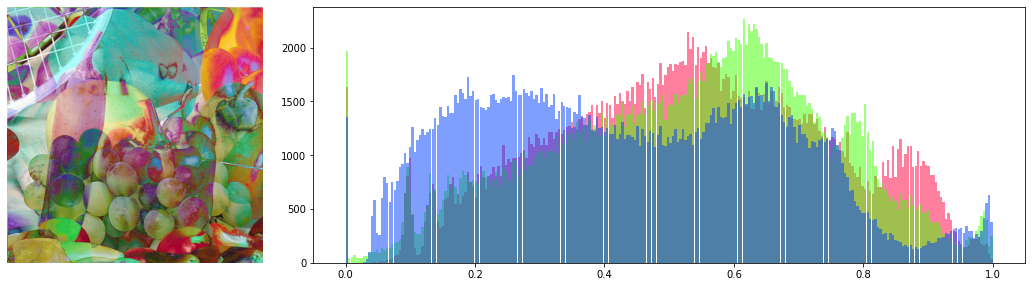

In [14]:
O = np.absolute(A_ - B_)
histogram(O**(1/g), bins=2**8, interval=[0, 1])

### 2.5. Division
---
$$ \large
O' = \frac{A'}{B'}
$$

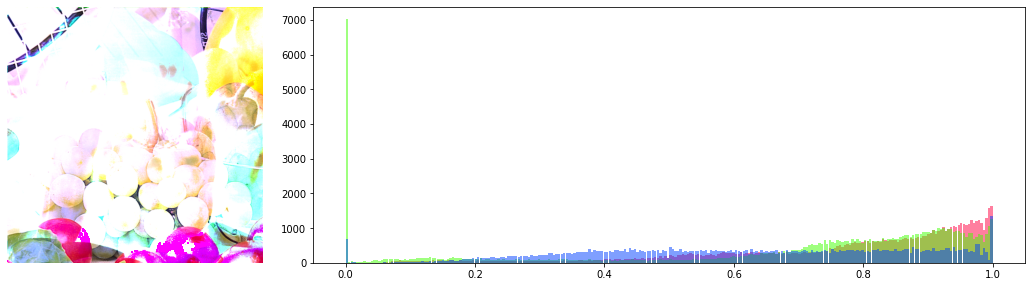

In [15]:
O = A_/B_
histogram(O**(1/g), bins=2**8, interval=[0, 1])

### 2.6. Exclusion
---
$$ \large
O' = A'+B'-2A'B'
$$

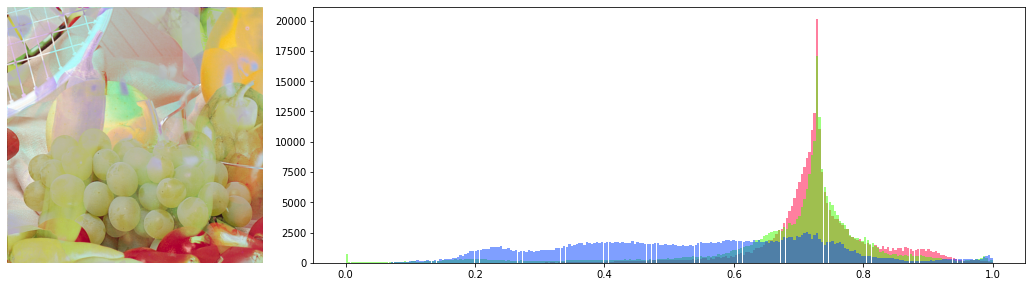

In [16]:
O = A_ + B_ - 2*A_*B_
histogram(O**(1/g), bins=2**8, interval=[0, 1])

### 2.7. From
---
$$ \large
O' = B'- A'
$$

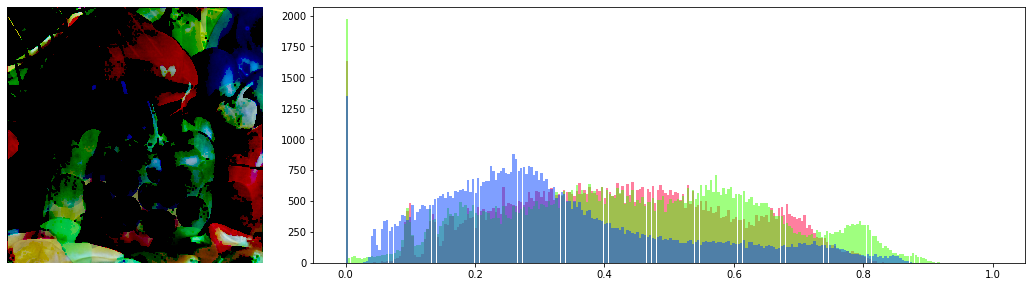

In [17]:
O = B_ - A_
histogram(O**(1/g), bins=2**8, interval=[0, 1])

### 2.8. Geometric
---
$$ \large
O' = \frac{2A'B'}{A'+B'}
$$

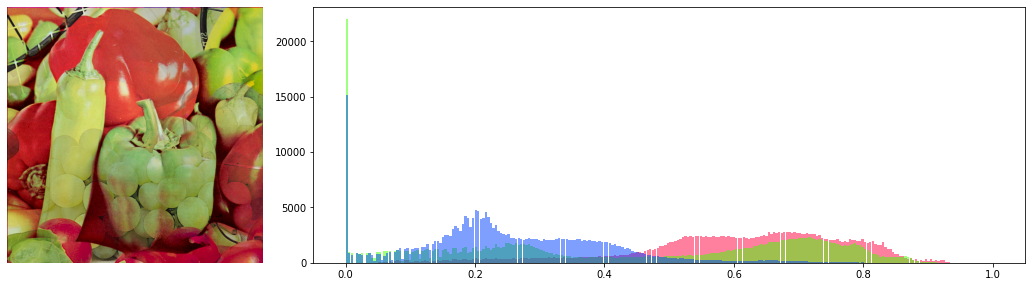

In [18]:
O = 2*A_*B_/(A_ + B_)
histogram(O**(1/g), bins=2**8, interval=[0, 1])

### 2.9. Hypot
---
$$ \large
O' = \sqrt{A'^2+B'^2}
$$

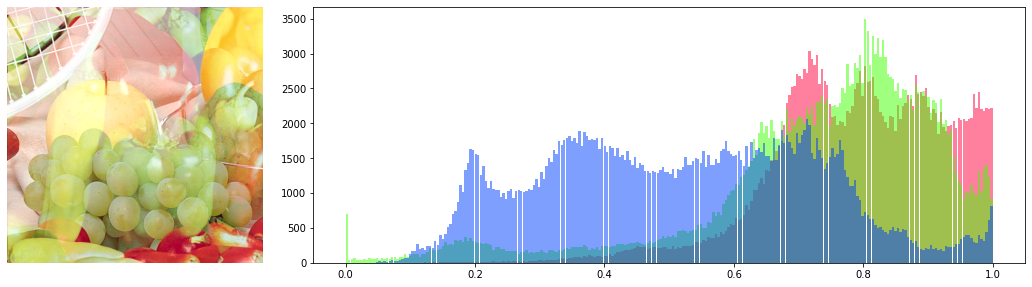

In [19]:
O = (A_**2 + B_**2)**0.5
histogram(O**(1/g), bins=2**8, interval=[0, 1])

### 2.10. Max
---
$$ \large
O' = \max(A', B')
$$

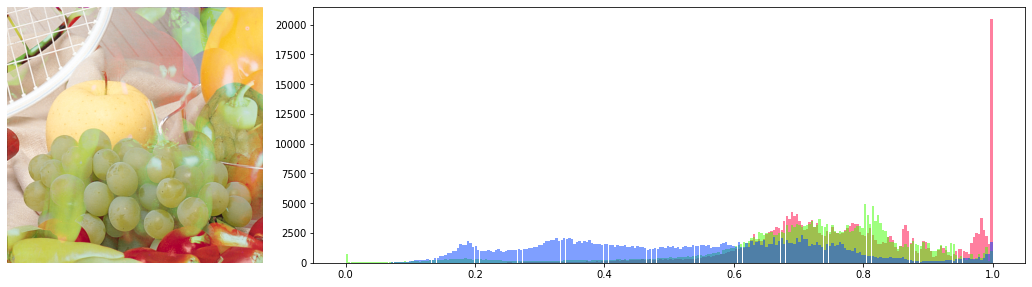

In [20]:
O = np.maximum(A_, B_)
histogram(O**(1/g), bins=2**8, interval=[0, 1])

### 2.11. Min
---
$$ \large
O' = \min(A', B')
$$

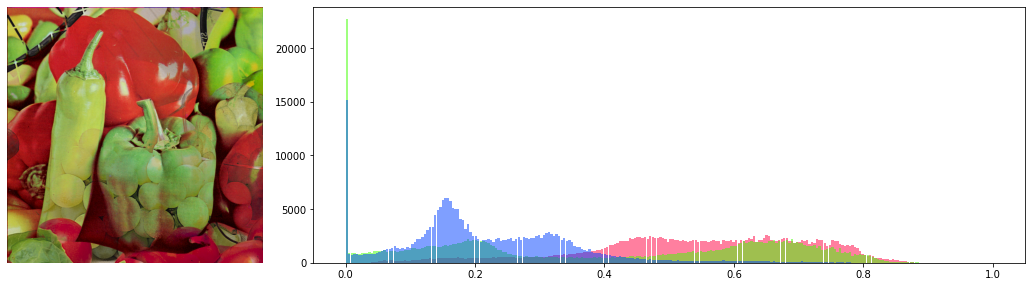

In [21]:
O = np.minimum(A_, B_)
histogram(O**(1/g), bins=2**8, interval=[0, 1])

### 2.12. Minus
---
$$ \large
O' = A'- B'
$$

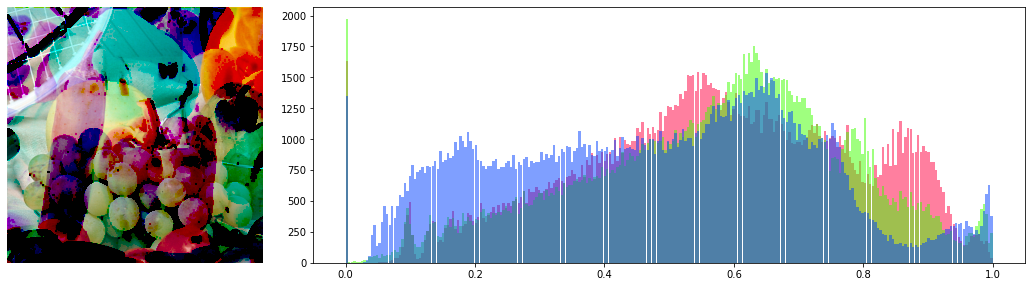

In [22]:
O = A_ - B_
histogram(O**(1/g), bins=2**8, interval=[0, 1])

### 2.13. Multiply
---
$$ \large
O' = A'B'
$$

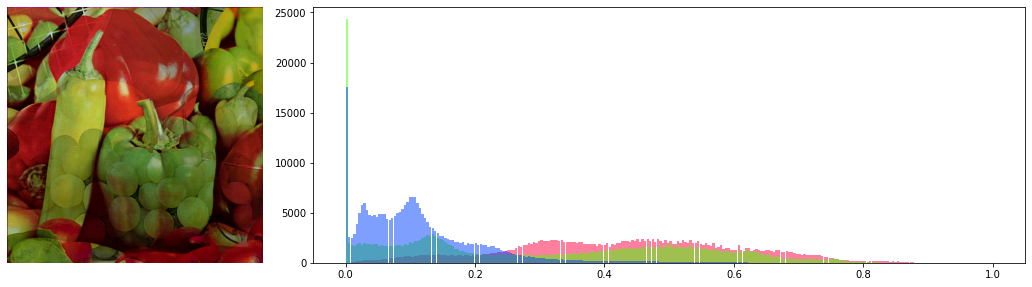

In [23]:
O = A_*B_
histogram(O**(1/g), bins=2**8, interval=[0, 1])

### 2.14. Plus
---
$$ \large
O' = A' + B'
$$

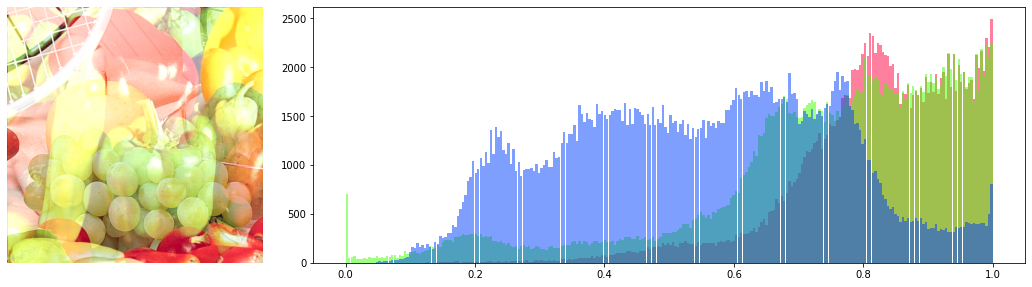

In [24]:
O = A_ + B_
histogram(O**(1/g), bins=2**8, interval=[0, 1])

### 2.15. Screen
---
$$ \large
O' = A' + B' - A'B'
$$

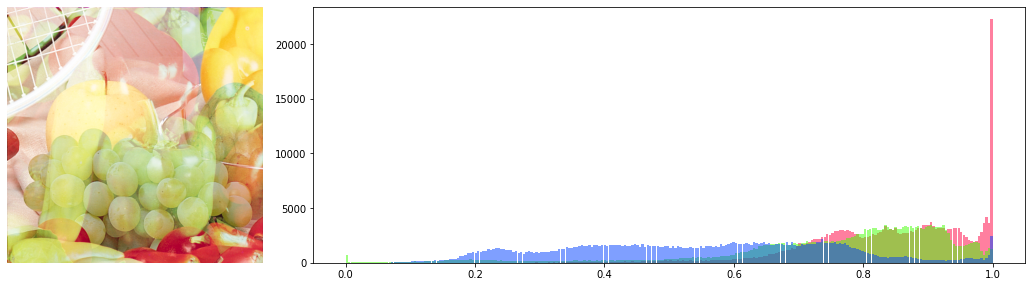

In [25]:
O = A_ + B_ - A_*B_
histogram(O**(1/g), bins=2**8, interval=[0, 1])

### 2.16. Soft light
---
$$ \large
O' = B'(2A' + B'(1 - A'B'))
$$

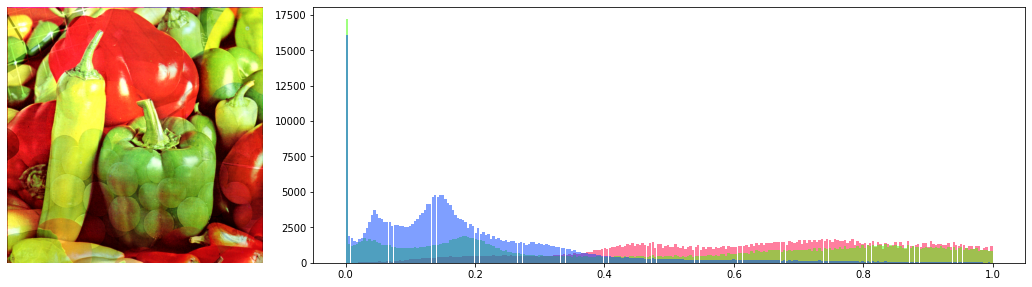

In [26]:
O = B_*(2*A_ + B_*(1 - A_*B_))
histogram(O**(1/g), bins=2**8, interval=[0, 1])

### 2.17. Hard light
---
$$ \large
O' =
\begin{cases}
    \text{multiply}&, \text{if } A < \frac{1}{2} \\
    \text{screen}&, \text{otherwise}
\end{cases}
$$

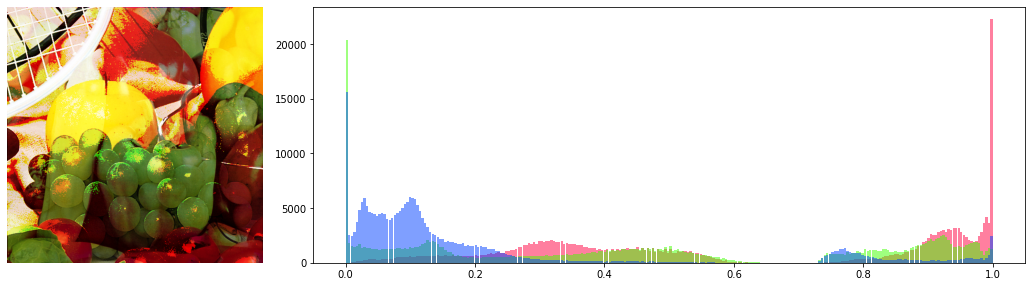

In [27]:
O = A_ + B_ - A_*B_
cond = A_ < 0.5
O[cond] = (A_*B_)[cond]
histogram(O**(1/g), bins=2**8, interval=[0, 1])

### 2.18. Overlay
---
$$ \large
O' =
\begin{cases}
    \text{multiply}&, \text{if } B < \frac{1}{2} \\
    \text{screen}&, \text{otherwise}
\end{cases}
$$

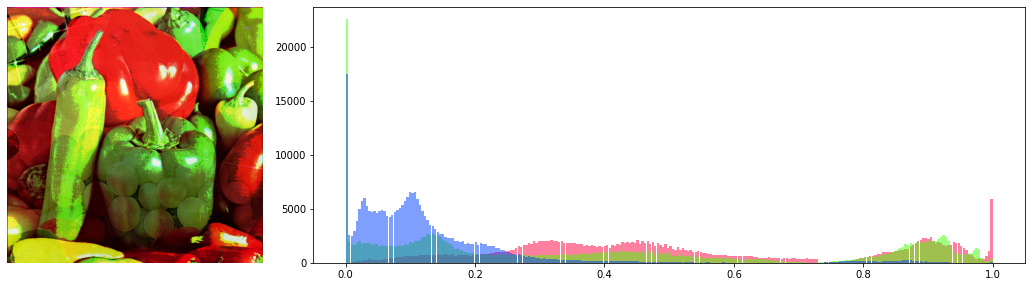

In [28]:
O = A_ + B_ - A_*B_
cond = B_ < 0.5
O[cond] = (A_*B_)[cond]
histogram(O**(1/g), bins=2**8, interval=[0, 1])